In [1]:
from pathlib import Path
from caiman import load_memmap
from ipywidgets import IntSlider, interact

In [2]:
memmap_list = list(Path('/home/kushal/rotations/hantman/JoyJ2/121819_IT/').glob('*order_F*.mmap'))

RFBOutputContext()


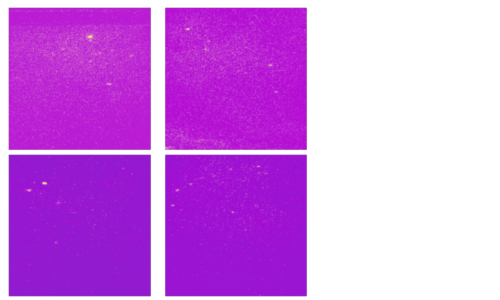

JupyterWgpuCanvas()

In [3]:
import numpy as np
import imageio
import pygfx as gfx

from wgpu.gui.jupyter import WgpuCanvas

from time import time

canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)
scene = gfx.Scene()

n_videos = 4
dims = (512, 512)

camera = gfx.OrthographicCamera(1800, 550)
camera.position.y = 512
camera.scale.y = -1
camera.position.x = 1736 / 2

colormap1 = gfx.cm.plasma

memmaped_images = list()
for i in range(n_videos):
    Yr, dims, T = load_memmap(memmap_list[i])
    images = np.reshape(Yr.T, [T] + list(dims), order='F')
    memmaped_images.append(images)


def create_first_frame(i):    
    return gfx.Image(
        gfx.Geometry(grid=gfx.Texture(memmaped_images[0][0].astype(np.float32), dim=2)),
        gfx.ImageBasicMaterial(clim=(2000, 6000), map=colormap1),
    )


images = list()
img_pos = 0


for i in range(n_videos):
    images.append(create_first_frame(i))
    
    images[-1].position.x = i % 2 * (50 + 512)
    
    if i > 1:
        images[-1].position.y = 512 + 16

    scene.add(images[-1])

frame_time = list()

slider_ix = 0

def update_img(obj):
    t1 = time()
    
    global slider_ix
    
    for img_ix, img in enumerate(images):
        img.geometry.grid = gfx.Texture(memmaped_images[img_ix][slider_ix], dim=2)
    
    global frame_time
    
    frame_time.append(time() - t1)


def animate():
    scene.traverse(update_img)
    renderer.render(scene, camera)
    canvas.request_draw()

canvas.request_draw(animate)

canvas

In [4]:
print(1 / np.mean(frame_time))

21973.15335419785


In [5]:
@interact
def slider_index_update(ix=(0, 4996, 1)):
    global slider_ix
    slider_ix = ix

interactive(children=(IntSlider(value=2498, description='ix', max=4996), Output()), _dom_classes=('widget-inte…